### 4.1 Preparatory code from module 3

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('03-classification-data.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [5]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [6]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [7]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

In [9]:
small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [10]:
val_dict_small = df_val[small_subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [11]:
y_pred = model.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5
(churn == y_val).mean()

np.float64(0.8016129032258065)

### 4.2 Accuracy and dummy model

In [12]:
# How many customers
len(y_val)

1860

In [13]:
# How many decisions are correct
(churn == y_val).sum()

np.int64(1491)

Accuracy = # of correct predictions / # of all customers

In [14]:
thresholds = np.linspace(0, 1, 21)
thresholds

scores = []

# Evaluating predictions for various thresholds
for t in thresholds:
    churn = (y_pred >= t)
    score = (churn == y_val).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

scores

0.00 0.261
0.05 0.501
0.10 0.595
0.15 0.640
0.20 0.690
0.25 0.730
0.30 0.755
0.35 0.767
0.40 0.782
0.45 0.795
0.50 0.802
0.55 0.790
0.60 0.790
0.65 0.788
0.70 0.774
0.75 0.752
0.80 0.742
0.85 0.739
0.90 0.739
0.95 0.739
1.00 0.739


[np.float64(0.26129032258064516),
 np.float64(0.5010752688172043),
 np.float64(0.5946236559139785),
 np.float64(0.6403225806451613),
 np.float64(0.6897849462365592),
 np.float64(0.7295698924731183),
 np.float64(0.7548387096774194),
 np.float64(0.7672043010752688),
 np.float64(0.7817204301075269),
 np.float64(0.7951612903225806),
 np.float64(0.8016129032258065),
 np.float64(0.7903225806451613),
 np.float64(0.7897849462365591),
 np.float64(0.7881720430107527),
 np.float64(0.7736559139784946),
 np.float64(0.7521505376344086),
 np.float64(0.7419354838709677),
 np.float64(0.7387096774193549),
 np.float64(0.7387096774193549),
 np.float64(0.7387096774193549),
 np.float64(0.7387096774193549)]

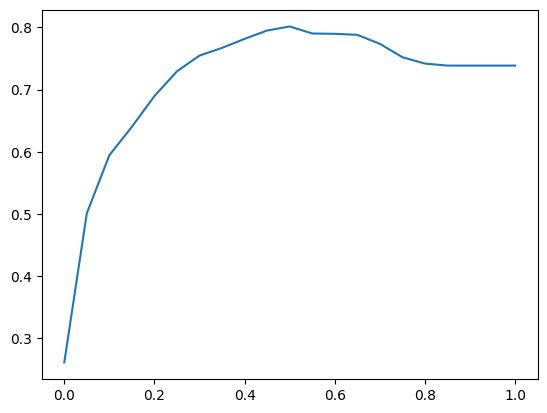

In [15]:
# Plot scores
plt.plot(thresholds, scores)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
# using built-in function
accuracy_score(y_val, y_pred >= 0.5)

0.8016129032258065

In [18]:
scores = []

# Evaluating predictions for various thresholds using the built-in functions
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

scores

0.00 0.261
0.05 0.501
0.10 0.595
0.15 0.640
0.20 0.690
0.25 0.730
0.30 0.755
0.35 0.767
0.40 0.782
0.45 0.795
0.50 0.802
0.55 0.790
0.60 0.790
0.65 0.788
0.70 0.774
0.75 0.752
0.80 0.742
0.85 0.739
0.90 0.739
0.95 0.739
1.00 0.739


[0.26129032258064516,
 0.5010752688172043,
 0.5946236559139785,
 0.6403225806451613,
 0.6897849462365592,
 0.7295698924731183,
 0.7548387096774194,
 0.7672043010752688,
 0.7817204301075269,
 0.7951612903225806,
 0.8016129032258065,
 0.7903225806451613,
 0.7897849462365591,
 0.7881720430107527,
 0.7736559139784946,
 0.7521505376344086,
 0.7419354838709677,
 0.7387096774193549,
 0.7387096774193549,
 0.7387096774193549,
 0.7387096774193549]

In [19]:
# If threshold is 1.0, customers are supposed to never churn. Does it happen?
from collections import Counter
Counter(y_pred >= 1.0)

Counter({np.False_: 1860})

Accuracy does not tell us how good the model is for a specific case: check the graph and how it behaves for 1.0 and 0.0

### 4.3 Confusion Tables

With binary classification, we can have four different outcomes: True Positive, True Negative, False Positive and False Negative

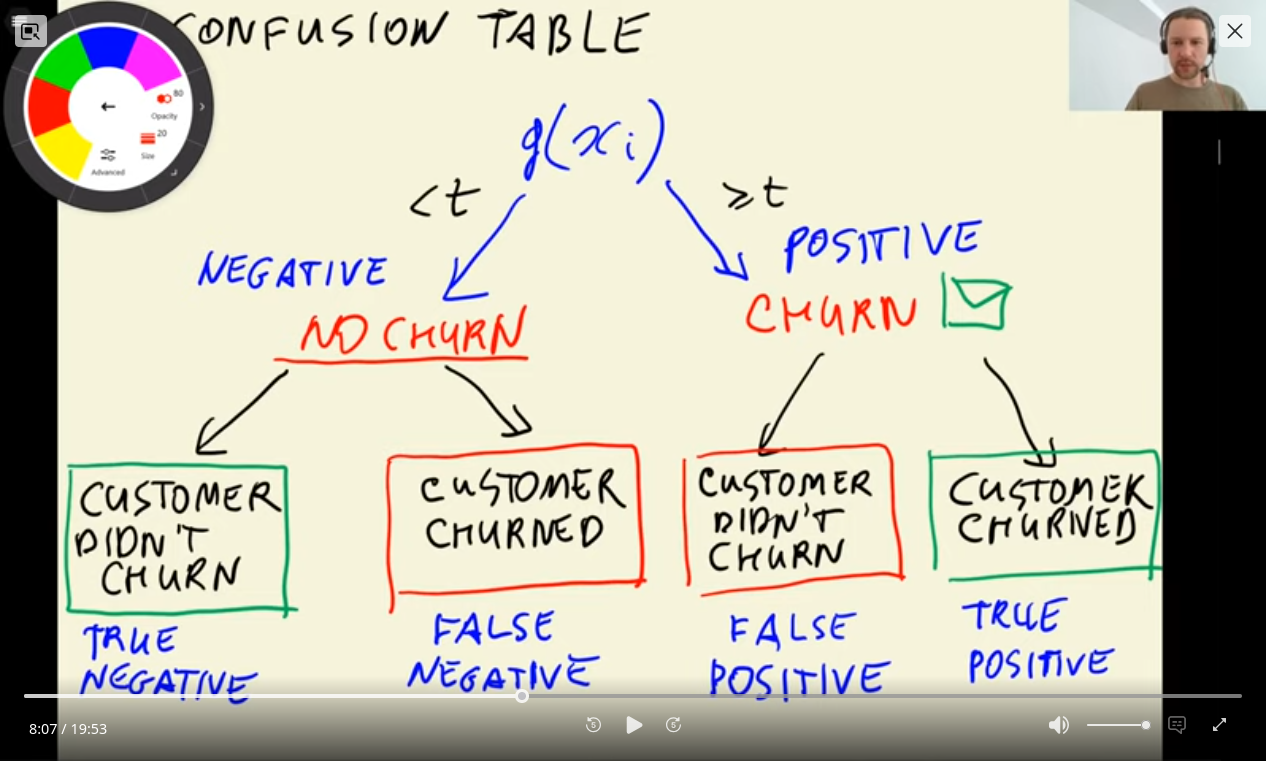

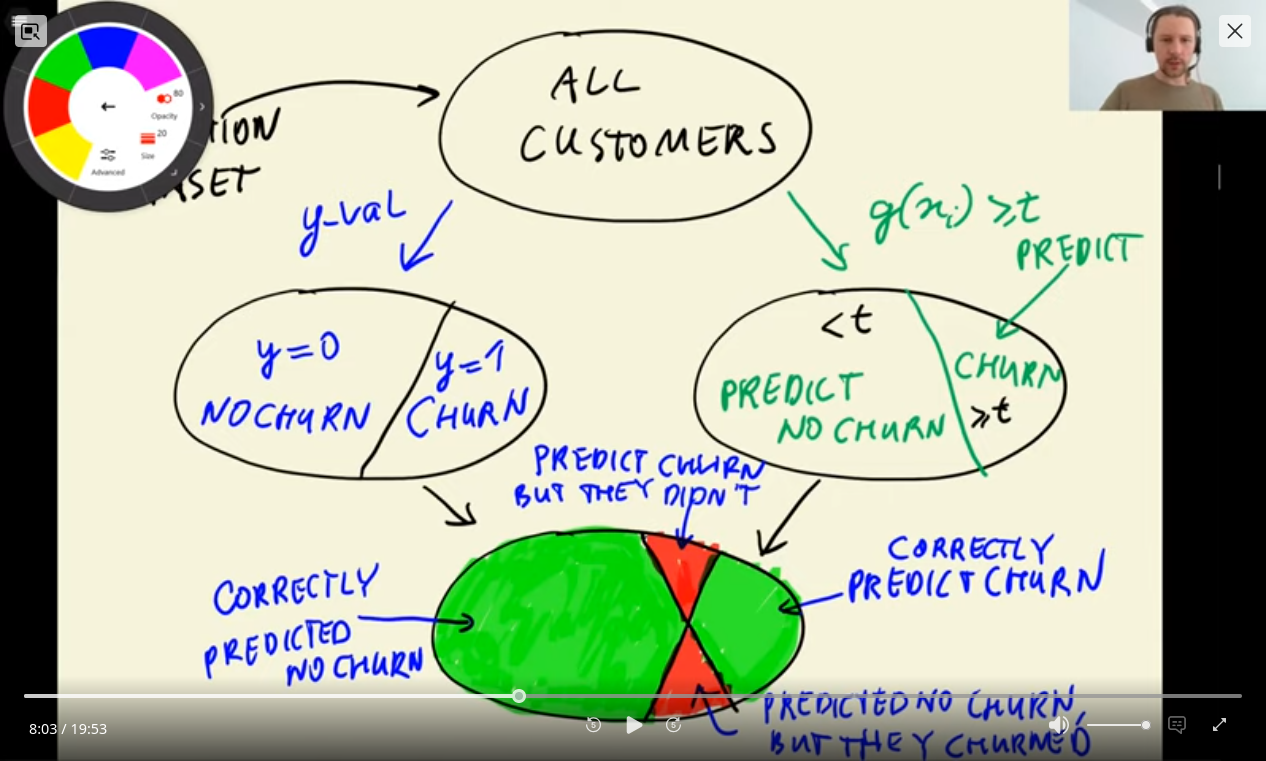

In [33]:
# Both should be true to return true
tp = (predict_positive & actual_positive).sum()

In [34]:
# Looking for true negative
tn = (actual_negative & predict_negative).sum()

In [35]:
# Looking for false positive
fp = (predict_positive & actual_negative).sum()

In [36]:
# Looking for false negative
fn = (predict_negative & actual_positive).sum()

In [37]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[1202,  172],
       [ 197,  289]])

In [39]:
# Normilising to get values as percentages
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.09],
       [0.11, 0.16]])

### 4.4 Precision and Recall

**Precision:** a fraction of positive predictions that turn out to be correct

**Precision** = TP / (TP + FP)

In [40]:
p = tp / (tp+fp)
p

np.float64(0.6268980477223427)

1 - 0.63 = 0.37 <= these are mistakes, or people who were not supposed to get a promotional email

**Recall**: a fraction of churning users that we identified correctly

**Recall** = TP / (TP + FN)

In [42]:
r = tp / (tp + fn)
r

np.float64(0.5946502057613169)

1 - 0.59 = 0.41 <= failed to identify these people

### 4.5 ROC Curves

ROC = Receiver operating characteristic

#### TPR and FPR

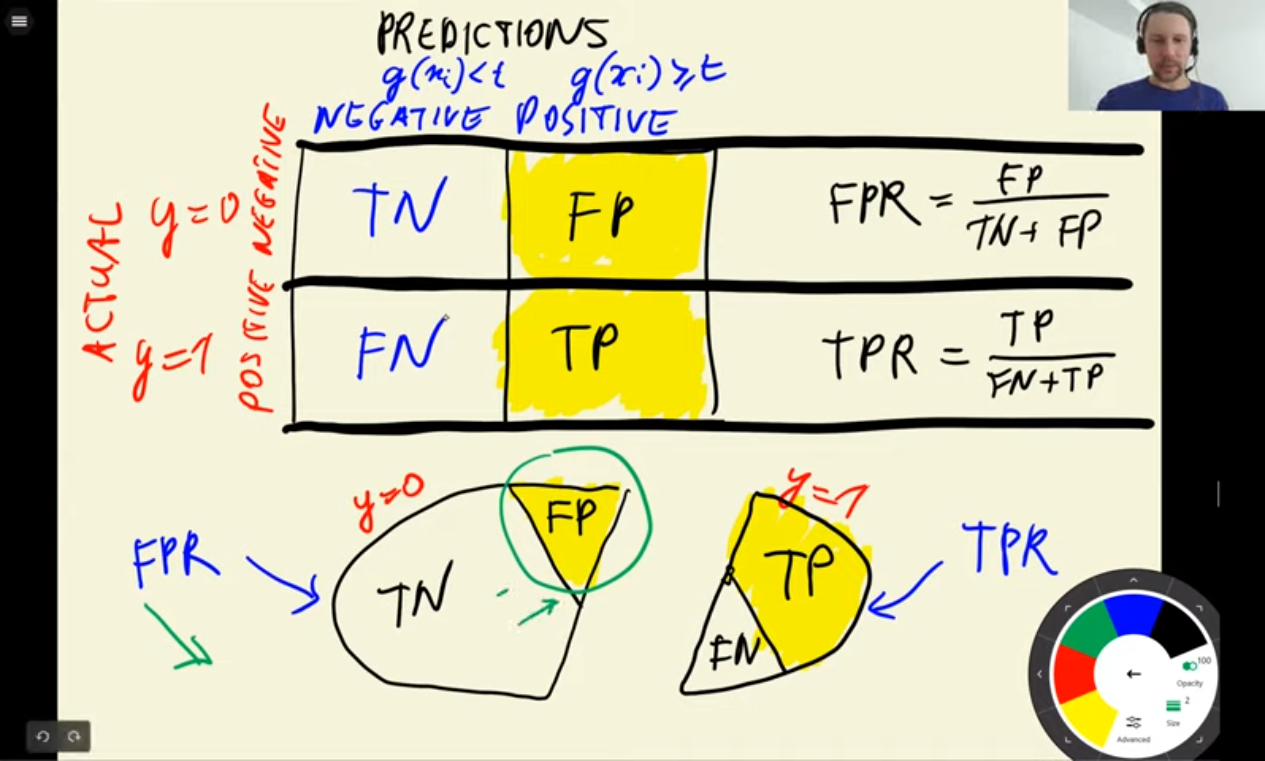

Goals:
- minimise FP to get the biggest possible TN
- maximize TP to get rid of FN

In [44]:
tpr = tp / (tp + fn)
tpr

np.float64(0.5946502057613169)

In [45]:
fpr = fp / (fp + tn)
fpr

np.float64(0.12518195050946143)

To draw ROC curves, we need to compute these values for all threasholds

In [46]:
thresholds = np.linspace(0, 1, 101)

scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (predict_positive & actual_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    # Putting values into a dataframe
    scores.append((t, tp, fp, fn, tn))

In [55]:
# Putting values into a dataframe
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,486,1374,0,0
1,0.01,483,1190,3,184
2,0.02,481,1074,5,300
3,0.03,478,1011,8,363
4,0.04,478,970,8,404
...,...,...,...,...,...
96,0.96,0,0,486,1374
97,0.97,0,0,486,1374
98,0.98,0,0,486,1374
99,0.99,0,0,486,1374


In [57]:
# Computing TPR and FPR
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [58]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,486,1374,0,0,1.000000,1.000000
1,0.01,483,1190,3,184,0.993827,0.866084
2,0.02,481,1074,5,300,0.989712,0.781659
3,0.03,478,1011,8,363,0.983539,0.735808
4,0.04,478,970,8,404,0.983539,0.705968
...,...,...,...,...,...,...,...
96,0.96,0,0,486,1374,0.000000,0.000000
97,0.97,0,0,486,1374,0.000000,0.000000
98,0.98,0,0,486,1374,0.000000,0.000000
99,0.99,0,0,486,1374,0.000000,0.000000


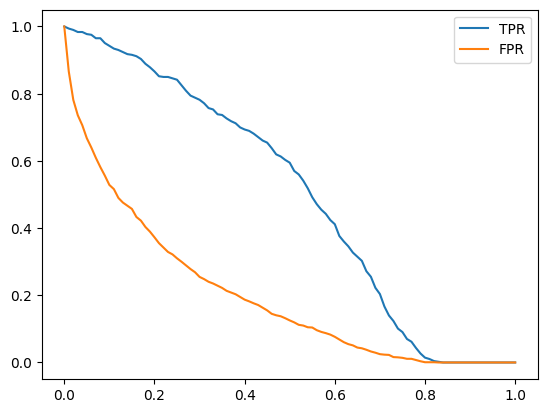

In [60]:
# Plotting the curves
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

#### Random model

In [62]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [64]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.478494623655914)

In [65]:
def tpr_fpr_dataframe(y_val, y_pred):
    thresholds = np.linspace(0, 1, 101)

    scores = []
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        tp = (predict_positive & actual_positive).sum()
        tn = (actual_negative & predict_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        # Putting values into a dataframe
        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [66]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,486,1374,0,0,1.000000,1.000000
1,0.01,481,1361,5,13,0.989712,0.990539
2,0.02,473,1341,13,33,0.973251,0.975983
3,0.03,470,1323,16,51,0.967078,0.962882
4,0.04,467,1307,19,67,0.960905,0.951237
...,...,...,...,...,...,...,...
96,0.96,19,55,467,1319,0.039095,0.040029
97,0.97,16,43,470,1331,0.032922,0.031295
98,0.98,11,24,475,1350,0.022634,0.017467
99,0.99,4,10,482,1364,0.008230,0.007278


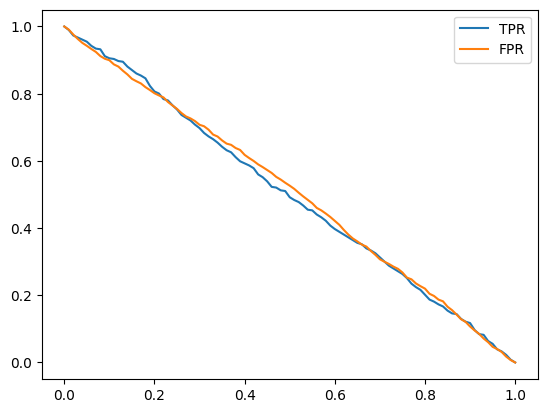

In [67]:
# Plotting the curves
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

#### Ideal model

In [68]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1374), np.int64(486))

In [70]:
# Ordering all data in a way that we have non-churning customers first
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1860,))

In [74]:
1 - y_val.mean()

np.float64(0.7387096774193549)

In [71]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [78]:
((y_ideal_pred >= 0.7387) == y_ideal).mean()

np.float64(1.0)

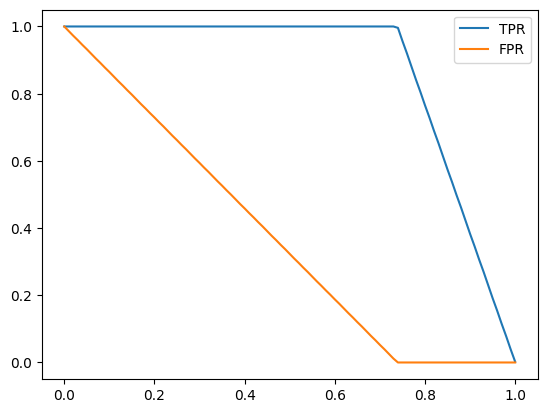

In [79]:
# Preparing to plot the ideal dataset
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

# Plotting the curves
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

#### Putting graphs together

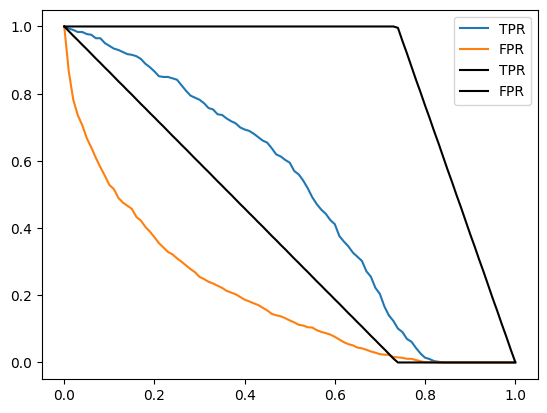

In [81]:
# Plotting the curves
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color='black')

plt.legend()

We want the curves to be as close to the ideal model as possible. However, plotting against the thresholds is not always intuitive

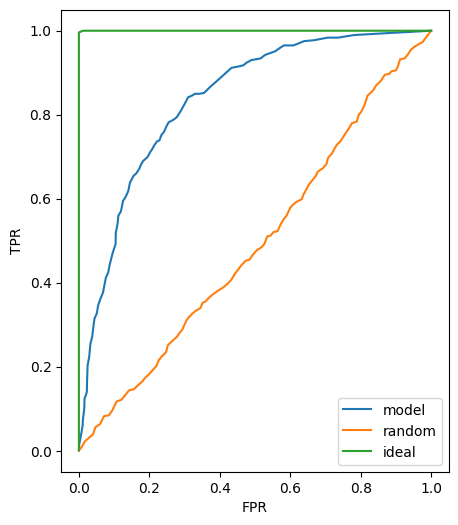

In [85]:
# Plotting rates on a square grid
plt.figure(figsize=(5,6))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

On this ROC curve, we plot TPR against FPR

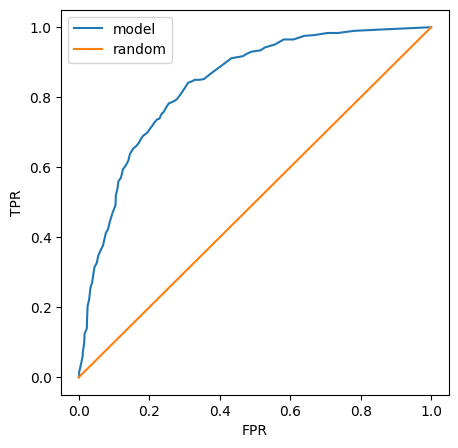

In [89]:
# Plotting rates on a square grid
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0, 1], [0, 1], label='random')
# plt.plot(df_rand.fpr, df_rand.tpr, label='random')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

Our ideal spot is the left up corner. We want our model to be as close to it as possible. At the same time, we want it to be as far from the random model as possible

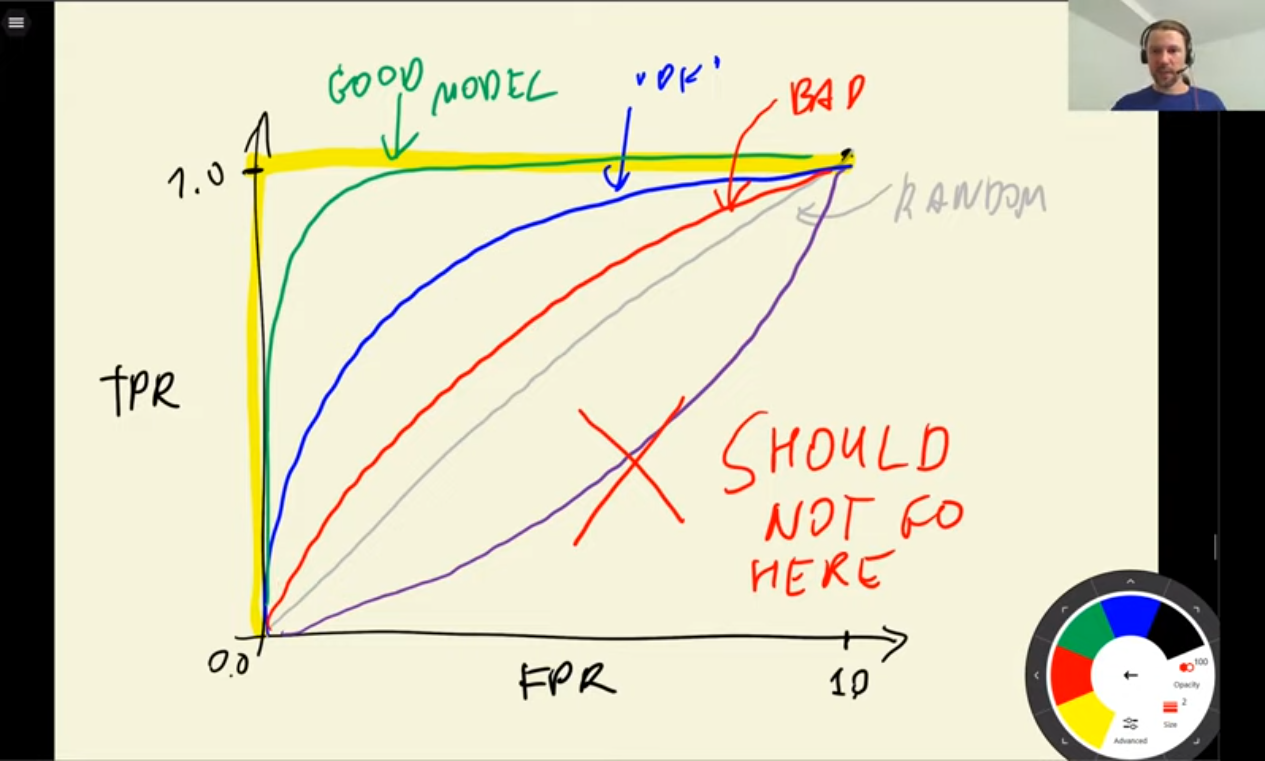

#### SKlearn to plot ROC curves

In [87]:
from sklearn.metrics import roc_curve

# The function output 3 values
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

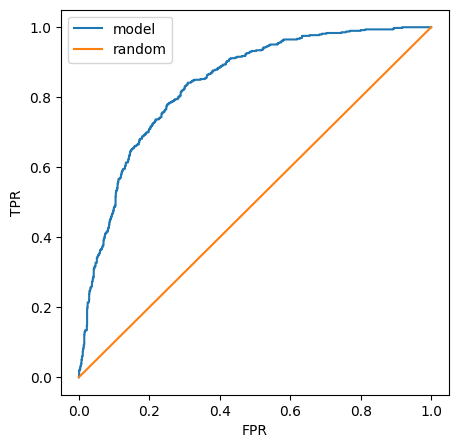

In [90]:
# Plotting rates on a square grid
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='model')
plt.plot([0, 1], [0, 1], label='random')
# plt.plot(df_rand.fpr, df_rand.tpr, label='random')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

### 4.6 ROC AUC

Area under the ROC curve